<a href="https://www.kaggle.com/code/prjwal07/finetuning?scriptVersionId=225489411" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasetfinal/New folder/Dataset/training/Humanitarian Aid and rehabilitation/14.jpeg
/kaggle/input/datasetfinal/New folder/Dataset/training/Humanitarian Aid and rehabilitation/55.jpeg
/kaggle/input/datasetfinal/New folder/Dataset/training/Humanitarian Aid and rehabilitation/18.jpeg
/kaggle/input/datasetfinal/New folder/Dataset/training/Humanitarian Aid and rehabilitation/56.jpeg
/kaggle/input/datasetfinal/New folder/Dataset/training/Humanitarian Aid and rehabilitation/16.jpeg
/kaggle/input/datasetfinal/New folder/Dataset/training/Humanitarian Aid and rehabilitation/44.jpeg
/kaggle/input/datasetfinal/New folder/Dataset/training/Humanitarian Aid and rehabilitation/31.jpeg
/kaggle/input/datasetfinal/New folder/Dataset/training/Humanitarian Aid and rehabilitation/25.jpeg
/kaggle/input/datasetfinal/New folder/Dataset/training/Humanitarian Aid and rehabilitation/43.jpeg
/kaggle/input/datasetfinal/New folder/Dataset/training/Humanitarian Aid and rehabilitation/67.jpeg
/kaggle/in

In [3]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalAveragePooling2D
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
from pathlib import Path  # Import Path from pathlib

image_dir = Path("/kaggle/input/datasetfinal/New folder/Dataset/")  # Define the image directory


In [5]:
image_dir

PosixPath('/kaggle/input/datasetfinal/New folder/Dataset')

In [6]:
file_paths = list(image_dir.glob(r'**/*.*'))  # Match all files
file_paths = [fp for fp in file_paths if fp.suffix.lower() in ['.jpg', '.jpeg', '.png']]

#labels are assumed to be folder name so here we r extracting them
labels = list(map(lambda x:os.path.split(os.path.split(x)[0])[1],file_paths))

#Converting filepaths list into pandas Series with column name as Filepath
file_paths = pd.Series(file_paths,name = 'Filepath').astype(str)

#converting labels into panda series
labels = pd.Series(labels,name='Label')

#combine both labels and filepaths pandas series into a single dataframe named images
images = pd.concat([file_paths,labels],axis=1)

In [7]:
absolute_file_paths = [os.path.abspath(fp) for fp in file_paths]


In [8]:
print(images.Label.value_counts())
# this is giving count of no.of images in training anf val folder


Label
Humanitarian Aid and rehabilitation    80
Combat                                 80
Fire                                   80
DestroyedBuildings                     80
Military vehicles and weapons          80
test                                   11
Name: count, dtype: int64


In [11]:
images.Label.value_counts()

Label
Humanitarian Aid and rehabilitation    80
Combat                                 80
Fire                                   80
DestroyedBuildings                     80
Military vehicles and weapons          80
test                                   11
Name: count, dtype: int64

In [12]:
print(len(file_paths))  # Should return the total number of images
print(file_paths[:5])   # Print a few file paths to check correctness


411
0    /kaggle/input/datasetfinal/New folder/Dataset/...
1    /kaggle/input/datasetfinal/New folder/Dataset/...
2    /kaggle/input/datasetfinal/New folder/Dataset/...
3    /kaggle/input/datasetfinal/New folder/Dataset/...
4    /kaggle/input/datasetfinal/New folder/Dataset/...
Name: Filepath, dtype: object


In [13]:
images

,Filepath,Label
0,/kaggle/input/datasetfinal/New folder/Dataset/...,Humanitarian Aid and rehabilitation
1,/kaggle/input/datasetfinal/New folder/Dataset/...,Humanitarian Aid and rehabilitation
2,/kaggle/input/datasetfinal/New folder/Dataset/...,Humanitarian Aid and rehabilitation
3,/kaggle/input/datasetfinal/New folder/Dataset/...,Humanitarian Aid and rehabilitation
4,/kaggle/input/datasetfinal/New folder/Dataset/...,Humanitarian Aid and rehabilitation
...,...,...
406,/kaggle/input/datasetfinal/New folder/Dataset/...,test
407,/kaggle/input/datasetfinal/New folder/Dataset/...,test
408,/kaggle/input/datasetfinal/New folder/Dataset/...,test
409,/kaggle/input/datasetfinal/New folder/Dataset/...,test


In [30]:
#do i need to do this , since already data is being seperated in folders?
train_df,test_df = train_test_split(images,train_size = 0.7 , shuffle = True,random_state = 1)

# Step 1: Directly separate test data using labels

#test_df = images[images['Label'] == 'test']  # Reserve predefined test data
#train_val_df = images[images['Label'] != 'test']  # Non-test data (for training/validation)

# Step 2: Split non-test data into train and validation (not "test_df" anymore)
#train_df, val_df = train_test_split(
 #   train_val_df, 
  #  train_size=0.7, 
   # shuffle=True, 
    #random_state=1
#)


# Now you have:
# - train_df: Training data (70% of non-test data)
# - val_df: Validation data (30% of non-test data)
# - test_df: Predefined test data (untouched until final evaluation)


In [31]:
#train_df = train_df[train_df['Label'] != 'test']
#test_df = test_df[test_df['Label'] != 'test']
train_df=images[images['Label']!='test']
test_df=images[images['Label']=='test']



In [32]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.resnet50.preprocess_input,
    validation_split=0.2)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input
)


In [33]:
train_images = train_generator.flow_from_dataframe(
    dataframe = train_df,
    x_col = 'Filepath',
    y_col = 'Label',
    target_size = (224,224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = True,
    seed = 42,
    subset = 'training',
)

val_images = train_generator.flow_from_dataframe(
    dataframe = train_df,
    x_col = 'Filepath',
    y_col = 'Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)


test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)



Found 320 validated image filenames belonging to 5 classes.
Found 80 validated image filenames belonging to 5 classes.
Found 11 validated image filenames belonging to 1 classes.


In [34]:
print(train_df['Label'].value_counts())
print(test_df['Label'].value_counts())


Label
Humanitarian Aid and rehabilitation    80
Combat                                 80
Fire                                   80
DestroyedBuildings                     80
Military vehicles and weapons          80
Name: count, dtype: int64
Label
test    11
Name: count, dtype: int64


In [35]:
pretrained_model = tf.keras.applications.resnet50.ResNet50(
    input_shape = (224,224,3),
    include_top = False,
    weights = 'imagenet',
    pooling = 'avg')
pretrained_model.trainable = False

In [36]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128,activation = 'relu' )(pretrained_model.output)
x = tf.keras.layers.Dense(50,activation = 'relu')(x)
outputs = tf.keras.layers.Dense(5,activation='softmax')(x)
model = tf.keras.Model(inputs,outputs)
print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,856,689 (91.01 MB)

 Trainable params: 268,977 (1.03 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

None


In [37]:
from tensorflow.keras.utils import Sequence

class CustomDataset(Sequence):  # Inherit from Sequence
    def __init__(self, data, labels, batch_size, **kwargs):
        super().__init__(**kwargs)  # Add this line to fix the warning
        self.data = data
        self.labels = labels
        self.batch_size = batch_size

    def __len__(self):
        return len(self.data) // self.batch_size

    def __getitem__(self, index):
        batch_data = self.data[index * self.batch_size:(index + 1) * self.batch_size]
        batch_labels = self.labels[index * self.batch_size:(index + 1) * self.batch_size]
        return batch_data, batch_labels


In [38]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    x=train_images, 
    validation_data=val_images, 
    epochs=25,
    callbacks=[callbacks]
)


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 906ms/step - accuracy: 0.4430 - loss: 1.4643 - val_accuracy: 0.1250 - val_loss: 2.5581
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 181ms/step - accuracy: 0.9480 - loss: 0.2053 - val_accuracy: 0.7125 - val_loss: 0.6637
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - accuracy: 0.9893 - loss: 0.0373 - val_accuracy: 0.7625 - val_loss: 0.6900
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - accuracy: 1.0000 - loss: 0.0087 - val_accuracy: 0.7750 - val_loss: 0.6324
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.8250 - val_loss: 0.4339
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 226ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.8125 - val_loss: 0.5735
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.7500 - val_loss: 0.7166
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 197ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.7625 - val

In [39]:
results = model.evaluate(test_images,verbose=0)
print(results)
print(f"Test Accuracy : {np.round(results[1] *100,2)}% ")

[41.201560974121094, 0.1818181872367859]
Test Accuracy : 18.18% 


In [45]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Convert labels to a NumPy array
labels_array = np.array(test_images.labels)

# Ensure labels are integers (important for class extraction)
labels_array = labels_array.astype(int)

# Generate predictions
predictions = np.argmax(model.predict(test_images), axis=1)

# Get unique classes **from labels and predictions** to ensure alignment
unique_classes = np.unique(np.concatenate((labels_array, predictions)))

# Ensure `target_names` has the same length as `unique_classes`
class_names = [f"Class {i}" for i in unique_classes]

# Generate confusion matrix and classification report
matrix = confusion_matrix(labels_array, predictions)
report = classification_report(
    labels_array,
    predictions,
    target_names=class_names,  # Now it should match the number of classes
    zero_division=0
)

print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
              precision    recall  f1-score   support

     Class 0       1.00      0.18      0.31        11
     Class 1       0.00      0.00      0.00         0
     Class 2       0.00      0.00      0.00         0
     Class 3       0.00      0.00      0.00         0
     Class 4       0.00      0.00      0.00         0

    accuracy                           0.18        11
   macro avg       0.20      0.04      0.06        11
weighted avg       1.00      0.18      0.31        11



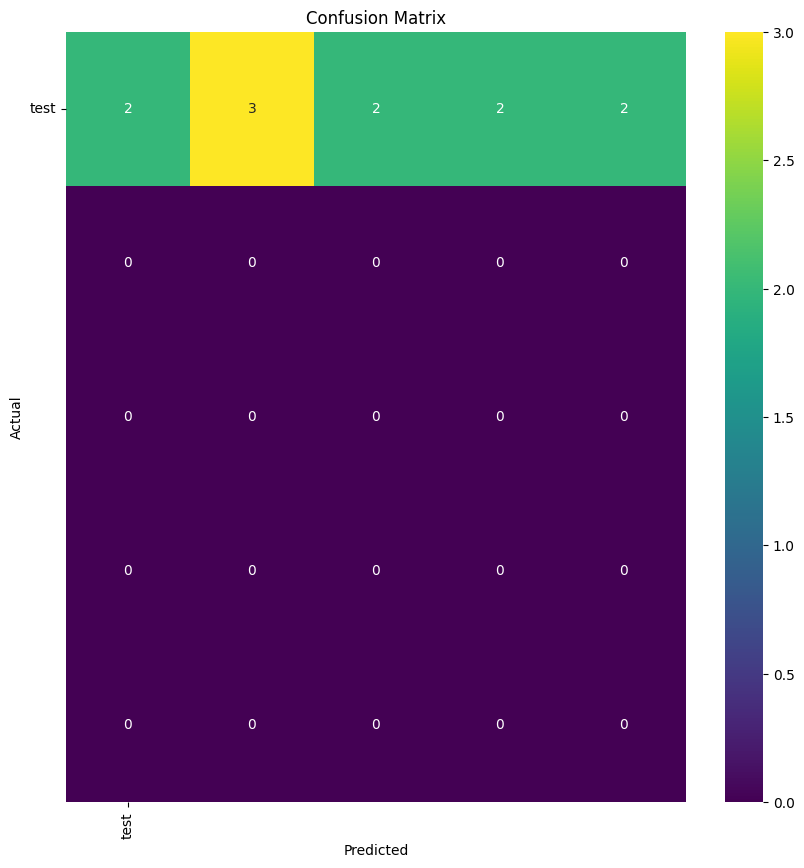

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10,10))  # 30x30 is too large, adjusted to 10x10 for better visibility

sns.heatmap(matrix, annot=True, cmap='viridis', fmt='d')

# Extract class names from dictionary
class_names = list(test_images.class_indices.keys())

# Set correct tick labels and positions
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, rotation=90)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, rotation=0)

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

# Save the figure correctly
fig.savefig("Confusion_Matrix.png", dpi=700)


In [49]:
print("Classification Report:\n",report)

Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      0.18      0.31        11
     Class 1       0.00      0.00      0.00         0
     Class 2       0.00      0.00      0.00         0
     Class 3       0.00      0.00      0.00         0
     Class 4       0.00      0.00      0.00         0

    accuracy                           0.18        11
   macro avg       0.20      0.04      0.06        11
weighted avg       1.00      0.18      0.31        11



In [50]:
data_his = pd.DataFrame(history.history)
data_his

,accuracy,loss,val_accuracy,val_loss
0,0.67500,0.968734,0.1250,2.558073
1,0.95625,0.144133,0.7125,0.663674
2,0.99375,0.028373,0.7625,0.689974
3,1.00000,0.007856,0.7750,0.632389
4,1.00000,0.003750,0.8250,0.433917
5,1.00000,0.002380,0.8125,0.573467
6,1.00000,0.001627,0.7500,0.716647
7,1.00000,0.001266,0.7625,0.687209


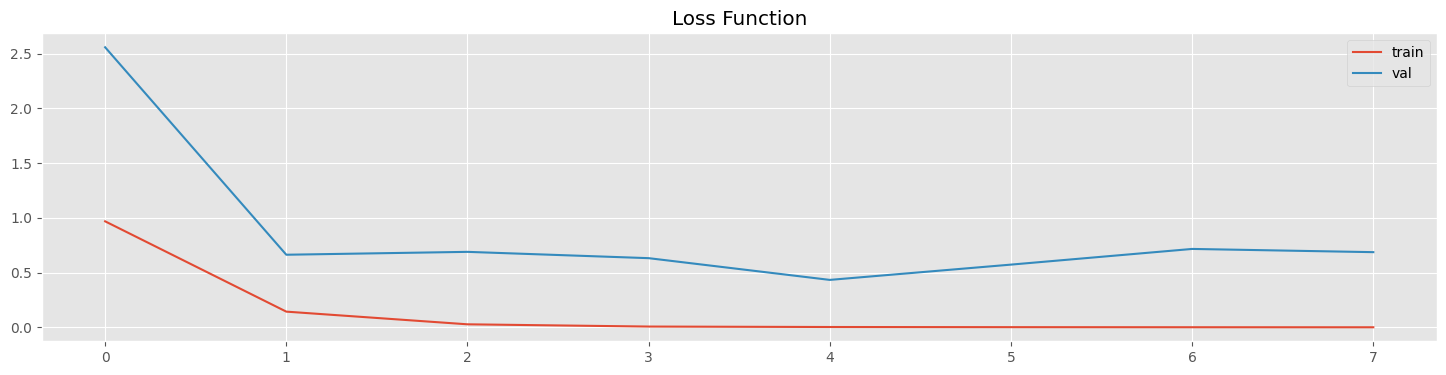

In [51]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(18, 4))
plt.plot(data_his['loss'], label = 'train')
plt.plot(data_his['val_loss'], label = 'val')
plt.legend()
plt.title('Loss Function')
plt.show()
fig.savefig("Loss Function",dpi=700)

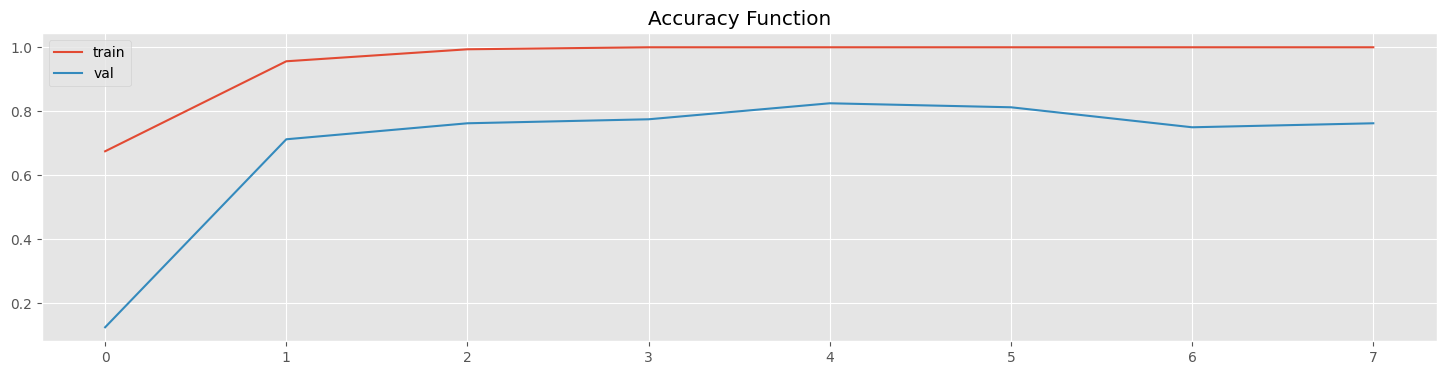

In [52]:
fig = plt.figure(figsize=(18, 4))
plt.plot(data_his['accuracy'], label = 'train')
plt.plot(data_his['val_accuracy'], label = 'val')
plt.legend()
plt.title('Accuracy Function')
plt.show()
fig.savefig("Accuracy Function",dpi=700)

In [53]:
train_images.class_indices.keys()


dict_keys(['Combat', 'DestroyedBuildings', 'Fire', 'Humanitarian Aid and rehabilitation', 'Military vehicles and weapons'])

In [54]:
df = pd.DataFrame({'names':list(train_images.class_indices.keys()),
                  'index':list(train_images.class_indices.values())})


In [55]:
df.iloc[0]['names']

'Combat'

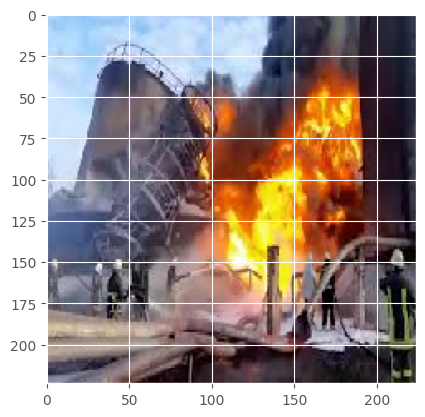

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2    Fire
Name: names, dtype: object


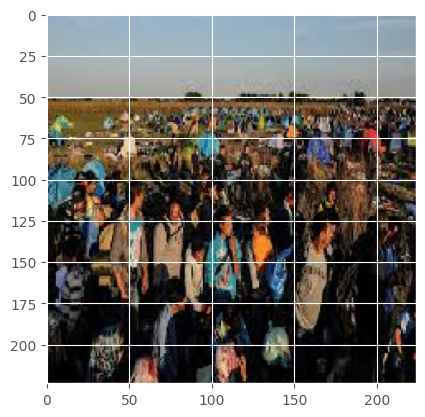

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3    Humanitarian Aid and rehabilitation
Name: names, dtype: object


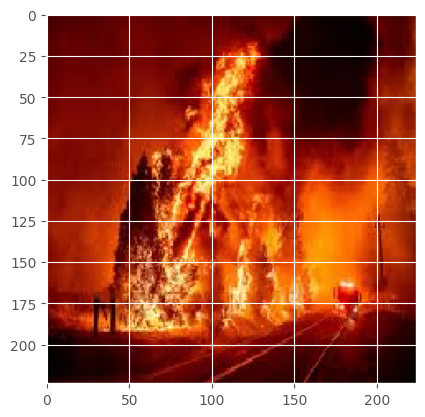

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2    Fire
Name: names, dtype: object


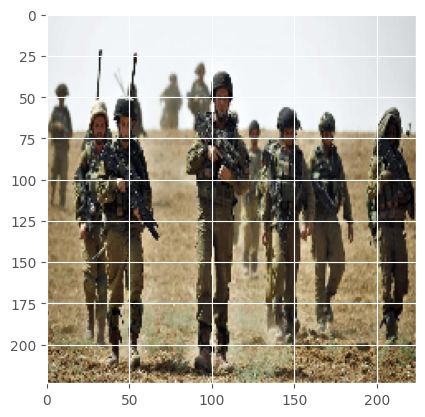

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
0    Combat
Name: names, dtype: object


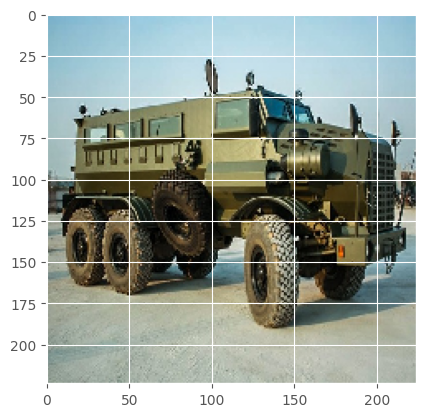

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4    Military vehicles and weapons
Name: names, dtype: object


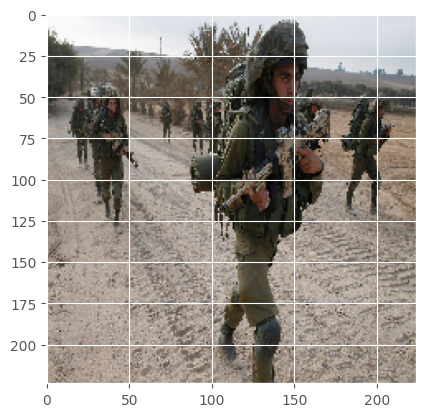

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
0    Combat
Name: names, dtype: object


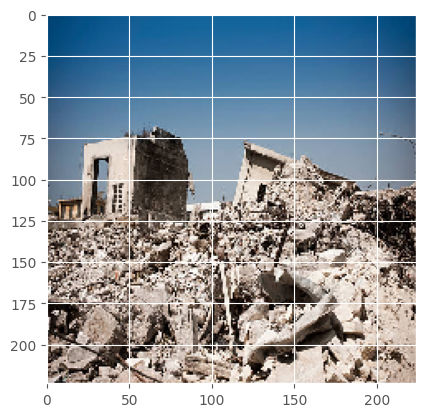

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1    DestroyedBuildings
Name: names, dtype: object


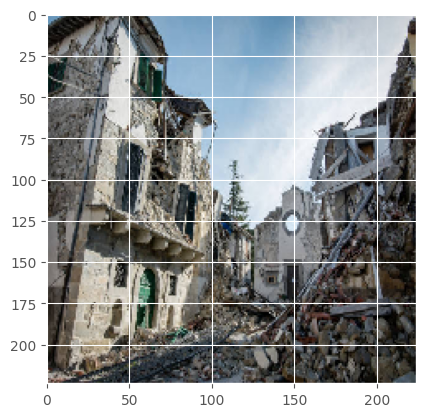

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1    DestroyedBuildings
Name: names, dtype: object


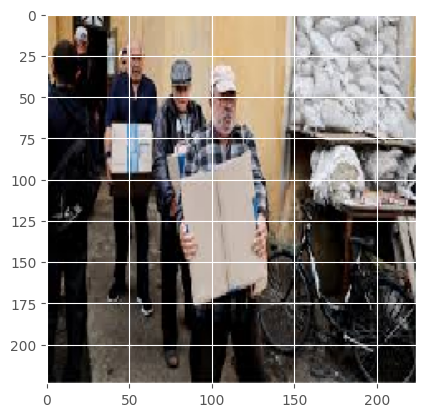

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
3    Humanitarian Aid and rehabilitation
Name: names, dtype: object


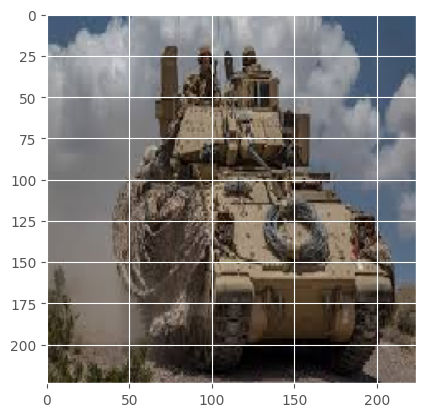

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4    Military vehicles and weapons
Name: names, dtype: object


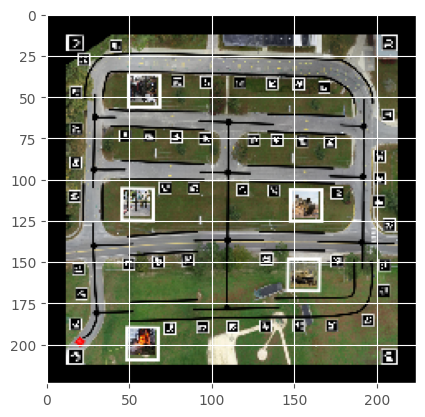

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1    DestroyedBuildings
Name: names, dtype: object


In [57]:
from tensorflow.keras.preprocessing import image
dir_path = '/kaggle/input/datasetfinal/New folder/Dataset/test'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'/'+i,target_size = (224,224))
    plt.imshow(img)
    plt.show()

    X=image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    predictions = np.argmax(model.predict(images),axis=1)
    print(df.iloc[predictions]['names'])
    

In [58]:
model.save("Finalmodel.h5")
